In [45]:
import numpy as np
import scipy.misc
import cv2

import glob

import matplotlib.pyplot as plt
import thinning as th
%matplotlib inline

In [46]:
scale = 1./16. #0.125
conversion = 0.345

In [47]:
masks = glob.glob('*.tif')

In [48]:
results = {}

In [60]:
for filename in masks:
    mask_name = str.split(filename,'.')[0]
    #read
    mask = cv2.imread(filename)
    #rescale
    mask1 = scipy.misc.imresize(mask, scale) 
    #grayscale
    mask_g = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    #threshold
    ret, mask_bw = cv2.threshold(mask_g, 127, 255, cv2.THRESH_BINARY)
    #invert, not necessary
    mask_bw = 255 - mask_bw
    # write mask to file
    cv2.imwrite(mask_name+'_msk.png',mask_bw)
    # thinning algo
    bw2 = th.thinning(mask_bw)
    # save thinned image
    cv2.imwrite(mask_name+'_thin.png',bw2)
    # distance transform
    dist = cv2.distanceTransform(mask_bw, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    # save dist transf image
    cv2.imwrite(mask_name+'_dt.png',dist)
    # compute thickness
    th_values = 2*dist[np.where(bw2>0.0)] / scale * conversion
    results[mask_name] = (np.mean(th_values), np.std(th_values), len(th_values))

In [61]:
print results

{'Box1': (120.36545, 47.182652, 2728)}


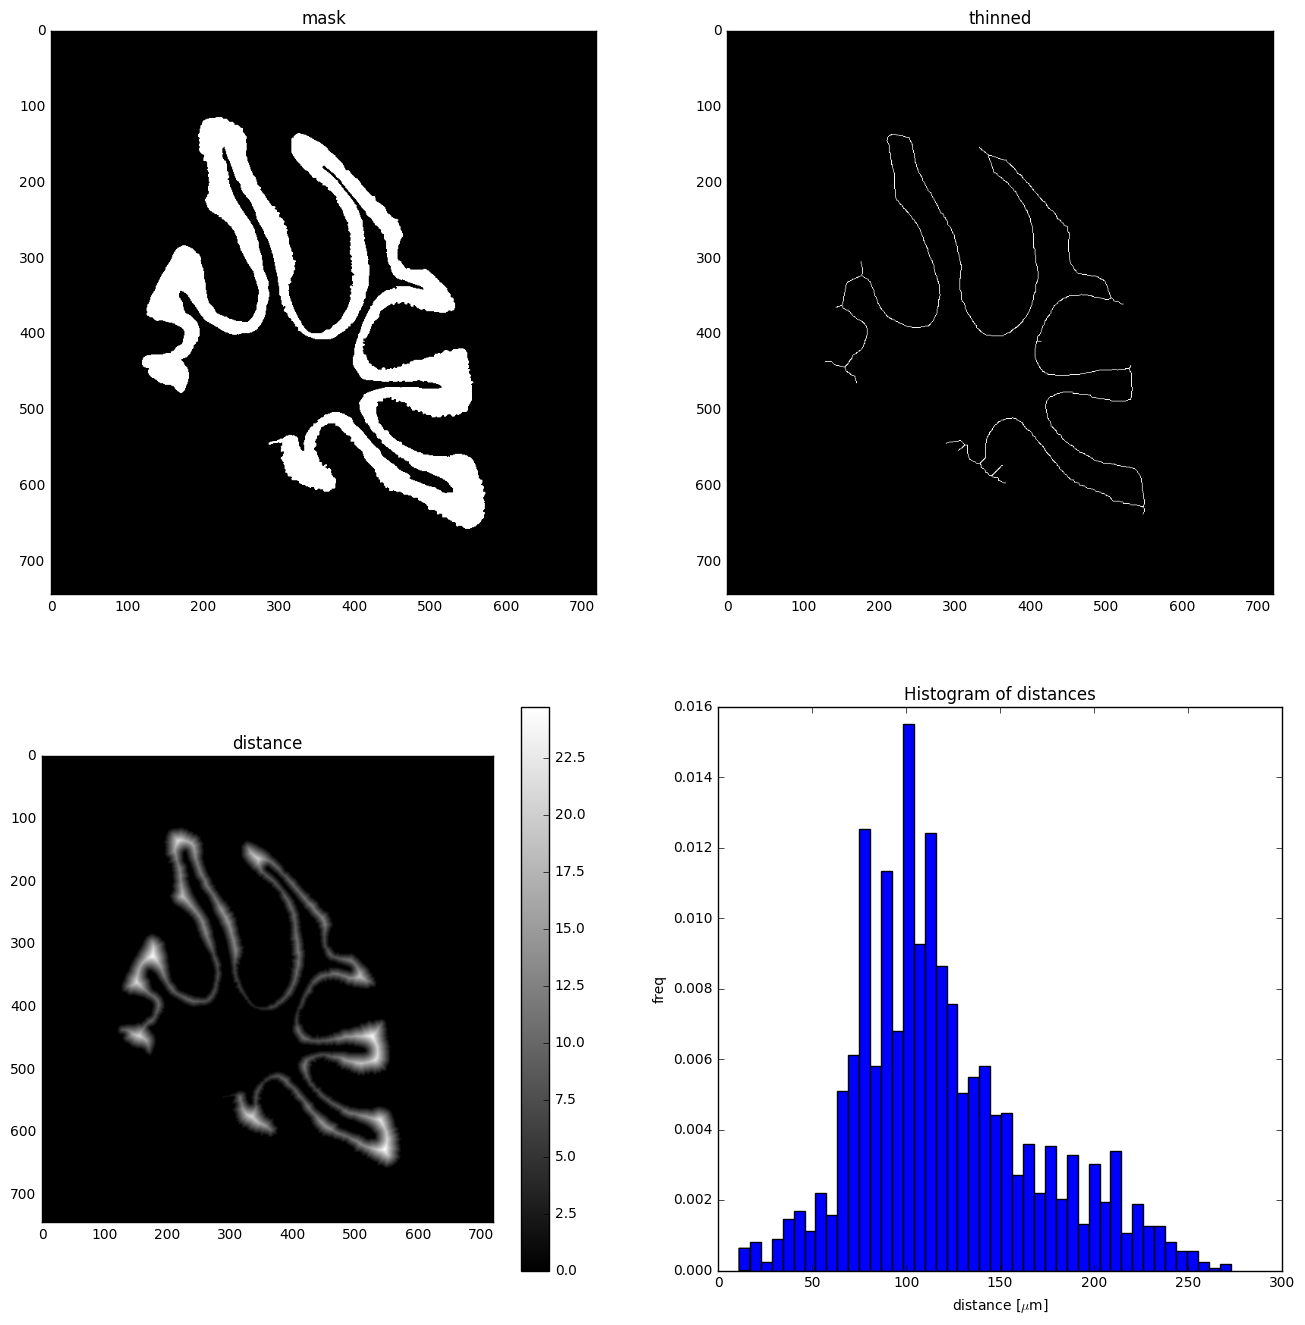

In [75]:
for mask in results:
    plt.figure(figsize=(16,16))
    plt.subplot(221)
    plt.title('mask')
    plt.imshow(mask_bw,cmap='gray')
    plt.subplot(222)
    plt.title('thinned')
    plt.imshow(bw2,cmap='gray')
    plt.subplot(223)
    plt.title('distance')
    plt.imshow(dist,cmap='gray')
    plt.colorbar()
    plt.subplot(224)
    #n, bins, patches = 
    plt.hist(th_values,bins=int(np.ceil(1.87*len(th_values-1)**0.4)),normed=1, histtype='bar')
    plt.title('Histogram of distances')
    plt.xlabel(r'distance [$\mu$m]')
    #plt.text(0.6,0.2,r'$\mu$ = {0:.2f} | $\sigma$ = {1:.2f}'.format(results[mask][0],results[mask][1]))
    plt.ylabel('freq')
    plt.savefig(mask+'_sp.png');

TypeError: text() takes at least 4 arguments (2 given)

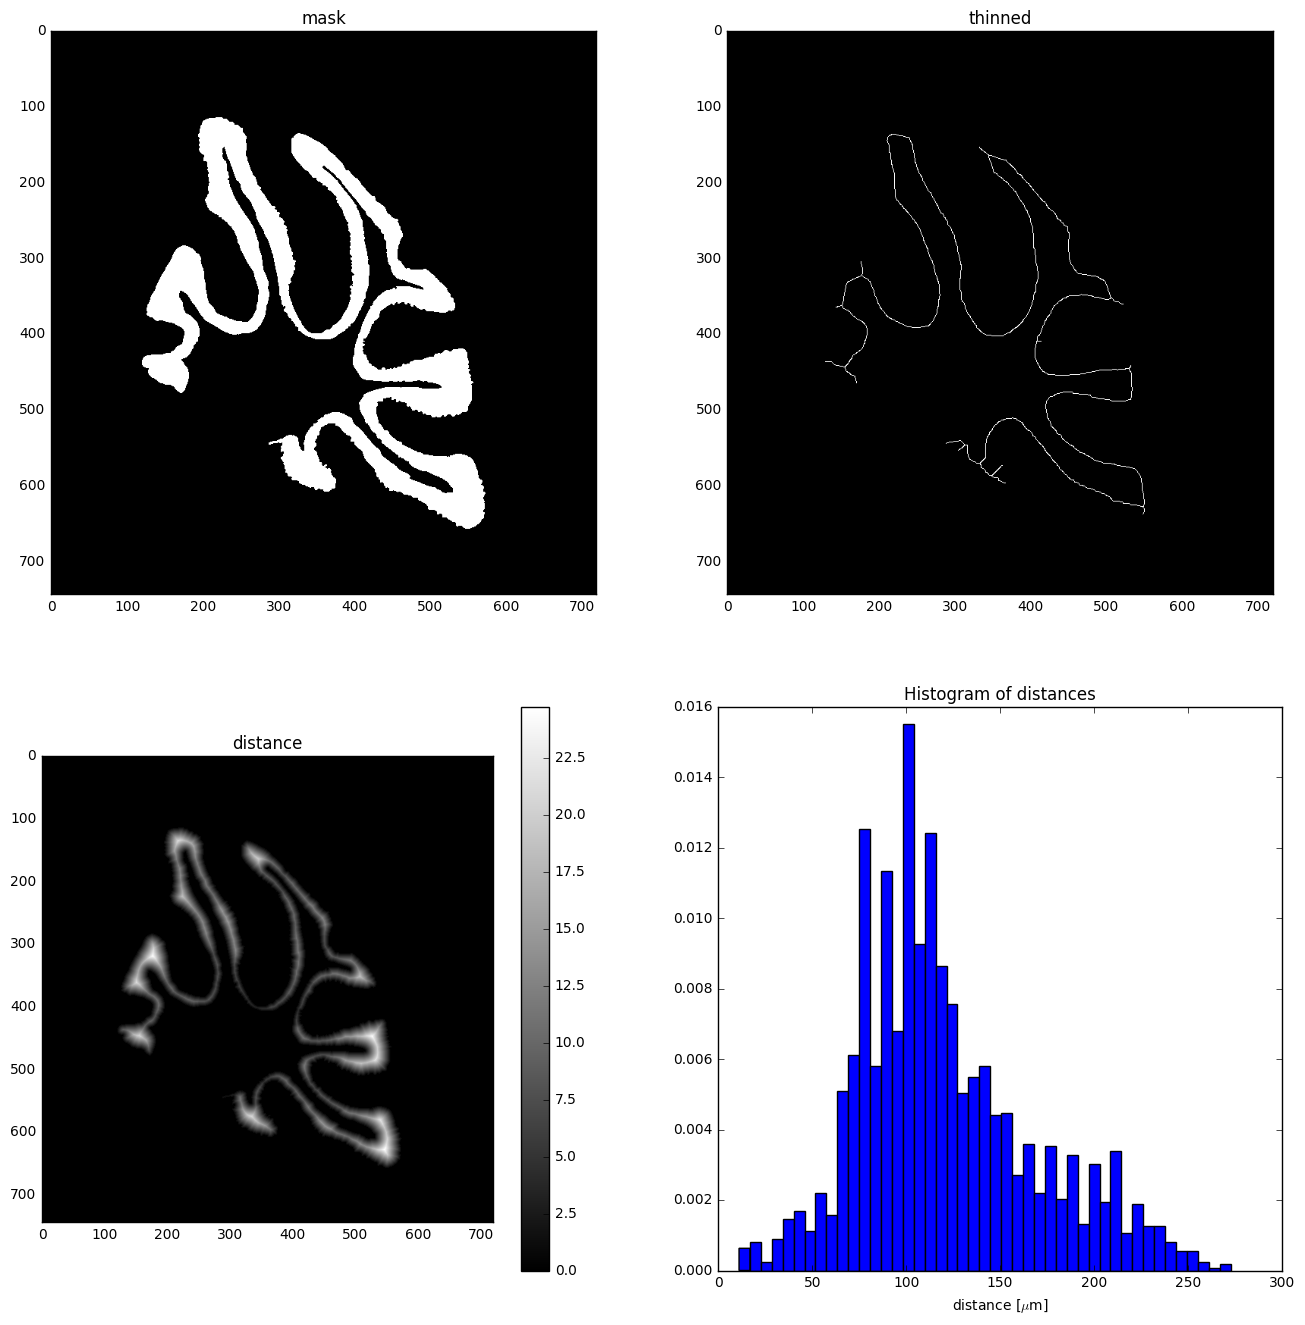

In [ ]:
masks